<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")
print("Number of Rows in Original File:",df.shape[0])
print("Number of Columns in Original File:",df.shape[1])

Number of Rows in Original File: 11398
Number of Columns in Original File: 85


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


Text(0, 0.5, 'Converted Salary')

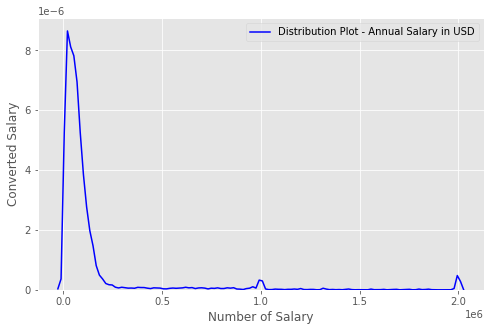

In [13]:
# your code goes here
mpl.style.use('ggplot')
width = 8
height = 5
plt.figure(figsize=(width, height))

sns.distplot(df['ConvertedComp'], hist=False, color='b', label="Distribution Plot - Annual Salary in USD" )
plt.xlabel("Number of Salary")
plt.ylabel("Converted Salary")






Plot the histogram for the column `ConvertedComp`.


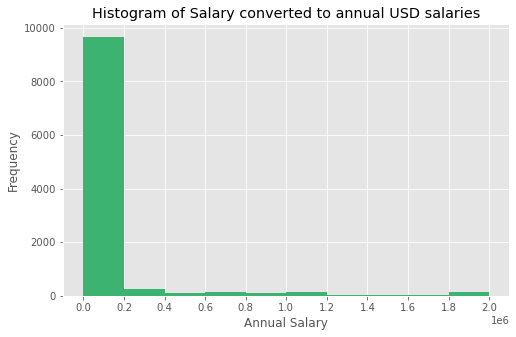

In [20]:
# your code goes here
df_na = df['ConvertedComp'].dropna()
count, bin_edges = np.histogram(df_na)

df_na.plot(kind='hist', figsize=(width, height), xticks=bin_edges, color='mediumseagreen')

plt.title('Histogram of Salary converted to annual USD salaries')
plt.ylabel('Frequency')
plt.xlabel('Annual Salary')

plt.show()

What is the median of the column `ConvertedComp`?


In [90]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [91]:
# your code goes here
print(df['Gender'].value_counts()['Man'])

10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [92]:
# your code goes here
print(df['Gender'].value_counts()['Woman'])

731


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [22]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


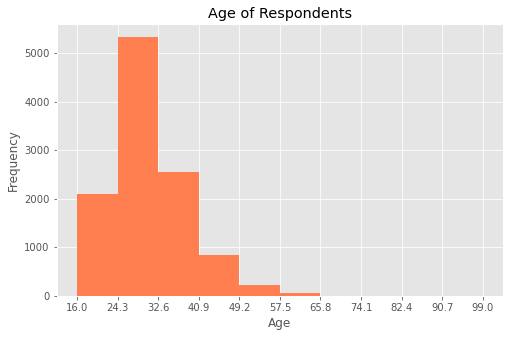

In [24]:
# your code goes here
count, bin_edges = np.histogram(df['Age'].dropna())

df['Age'].plot(kind='hist', figsize=(width, height), xticks=bin_edges, color='coral')

plt.title('Age of Respondents')
plt.ylabel('Frequency')
plt.xlabel('Age')

plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


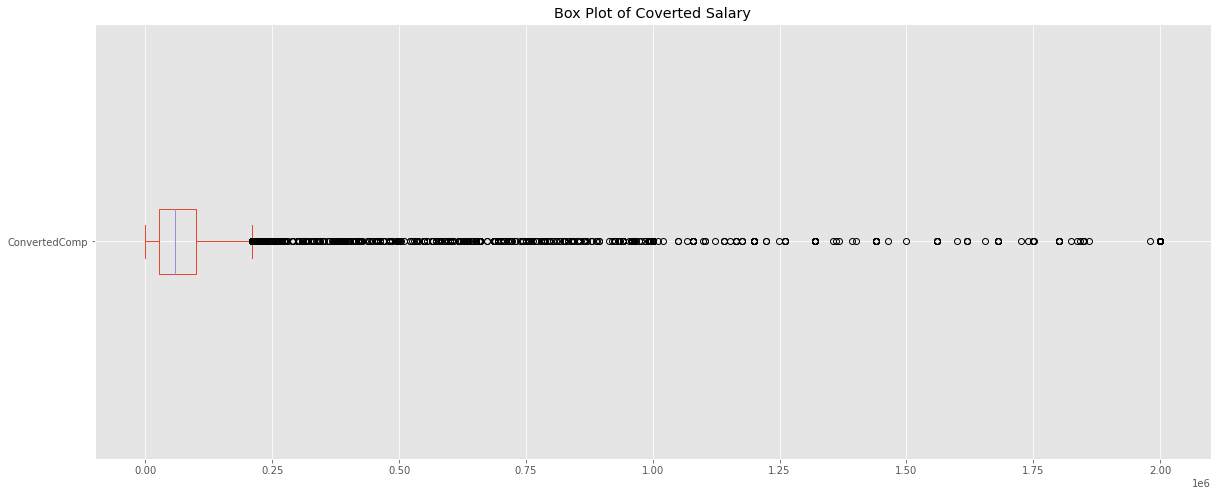

In [27]:
#df['ConvertedComp'].isnull().sum()
df_nonull = df['ConvertedComp'].dropna()
df_nonull.plot.box(figsize = (20,8), vert=False)
plt.title("Box Plot of Coverted Salary")
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [28]:
# your code goes here
q3, q1 = np.percentile(df_nonull, [75, 25])
inter_quar_range = q3 - q1
inter_quar_range

73132.0

Find out the upper and lower bounds.


In [29]:
# your code goes here
upper_bound = q3 + (1.5*inter_quar_range)
lower_bound = q1 - (1.5*inter_quar_range)
print("Upper Bound:",upper_bound, "and Lower Bound:",lower_bound)

Upper Bound: 209698.0 and Lower Bound: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [30]:
# your code goes here
def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3-q1
    outliers = df[((df<(q1-1.5 * IQR)) | (df>(q3+1.5 * IQR)))]
    return outliers

outliers = find_outliers_IQR(df_nonull)
outliers.count()


879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [43]:
# your code goes here
upper = np.where(df['ConvertedComp'] >= upper_bound)
lower = np.where(df['ConvertedComp'] <= lower_bound)

#Removing the Outliers
df.drop(upper[0],inplace=True)
df.drop(lower[0],inplace=True)

print("dimensions of df:",df.shape)

dimensions of df: (10519, 85)


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [44]:
# your code goes here
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.019364,0.010878,-0.015275,0.002980,0.003950
CompTotal,-0.019364,1.000000,-0.063561,0.004975,0.017536,0.006371
ConvertedComp,0.010878,-0.063561,1.000000,0.034351,-0.088934,0.401821
WorkWeekHrs,-0.015275,0.004975,0.034351,1.000000,0.031963,0.037452
CodeRevHrs,0.002980,0.017536,-0.088934,0.031963,1.000000,-0.017961
Age,0.003950,0.006371,0.401821,0.037452,-0.017961,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
